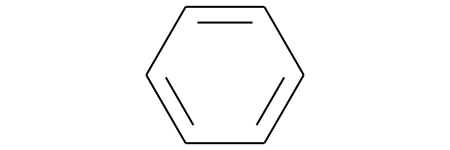

In [1]:
from rdkit import Chem

mol = Chem.MolFromSmiles('c1ccccc1')
mol

In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True 

In [3]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

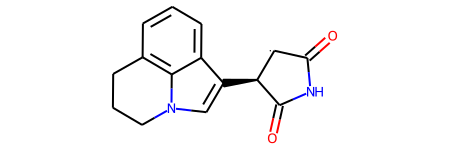

In [4]:
m = Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)")
m 

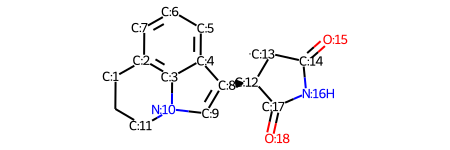

In [5]:
# atom index
mol_with_atom_index(m)

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem

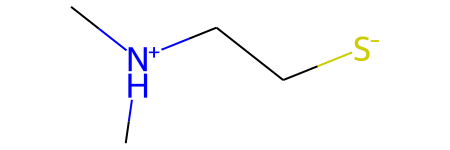

In [7]:
p = Chem.MolFromSmiles('C[NH+](C)CC[S-]')
AllChem.ComputeGasteigerCharges(p)
p

In [13]:
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

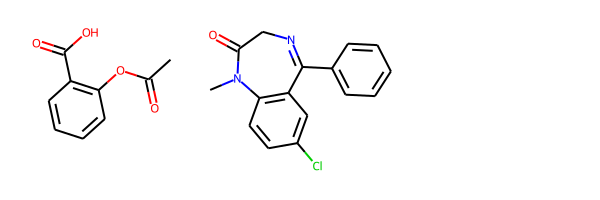

In [14]:
ms = [Chem.MolFromSmiles(x) for x in ('c1cc(C(=O)O)c(OC(=O)C)cc1', 'CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3')]
Draw.MolsToGridImage(ms)

In [10]:

def mol_with_stereo(mol,molSize=(233, 250), kekulize=True, fontSize = 6, LineWidth = 4):
    # check for defective molecule
    if mol is None:
        return None

    mol = rdMolDraw2D.PrepareMolForDrawing(mol, kekulize)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[1], molSize[1])
    drawer.SetFontSize(fontSize)
    drawer.drawOptions().addStereoAnnotation = True
    # drawer.drawOptions().addAtomIndices = True

    try:
        drawer.SetLineWidth(LineWidth)
    except:
        pass

    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg

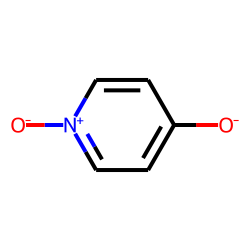

In [11]:
m = Chem.MolFromSmiles('[O-]C1=CC=[N+]([O-])C=C1')
SVG(mol_with_stereo(m))

In [12]:
for mol_ in p.GetBonds():
    print(mol_.GetBeginAtomIdx(),mol_.GetEndAtomIdx(),
          mol_.GetBondType(),mol_.GetStereo())

0 1 SINGLE STEREONONE
1 2 SINGLE STEREONONE
1 3 SINGLE STEREONONE
3 4 SINGLE STEREONONE
4 5 SINGLE STEREONONE
